In [1]:
import numpy as np
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

TensorFlow是一个用于数值计算的强大开源软件库，非常适合大型机器学习。它背后的原理很简单：首先在Python中定义一个用来计算的图（见图9-1），然后TensorFlow就会使用这个图，并用优化过的C++代码来执行计算。

![图9-1：一个简单的计算图](images/VNote/20201202104105073_12738.png)

图9-1：一个简单的计算图

最重要的是，TensorFlow可以将一个计算图划分成多个子图，然后并行地在多个CPU或者GPU上执行（见图9-2）。TensorFlow还支持分布式计算，这样可以在合理的时间内，通过在数百台服务器上分割计算，在庞大的训练集上训练巨大的神经网络（详见第12章）。TensorFlow可以在由数十亿个实例组成的训练集上训练具有数百万个参数的神经网络，每个实例具有数百万个特征。这些其实也都不足为奇，毕竟TensorFlow是由Google Brain小组开发的，而且Google众多的大型服务（比如Google Cloud Speech、Google Photos、Google Search等）背后都有TensorFlow的支持。

在TensorFlow从2015年11月宣布开源的时候，深度学习领域已经存在众多流行的开源库（表9-1中列出了一些）。不过，TensorFlow凭借自己清晰的设计、扩展性、灵活性 [1] 和完善的文档（更别提Google的名字了）很快就排在了这个列表的顶端。简而言之，TensorFlow兼具灵活性和扩展性，可直接供生产系统使用，其他已有的框架仅仅能做到这三者中的两个。以下是TensorFlow的一些亮点：

![图9-2：多CPU/GPU/服务器上的并行计算](images/VNote/20201202104149601_32595.png)

图9-2：多CPU/GPU/服务器上的并行计算

* 它可以运行在Windows、Linux、macOS和移动设备上，包括iOS和Android。

* 它提供了一个非常简单的名叫TF.Learn [2] （tensorflow.contrib.learn）的Python API来兼容Scikit-Learn。只需要几行代码，就可以用它来训练各种类型的神经网络。这个库的前身是一个独立的项目，叫作Scikit-Flow（或者简称skflow）。

* 它还提供另一个叫作TF-Slim（tensorflow.contrib.slim）的简单API来简化神经网络的构建、训练和评估。

* 在TensorFlow之上，独立构建了一些高级的API，比如Keras（ http://keras.io ）和Pretty Tensor（ https://github.com/google/prettytensor/ ）。

* 它的Python API提供了很多灵活的方式（代价是很高的复杂性）来创建所有类型的计算，包括所有能想到的神经网络架构。

* 它包含了很多非常高效的、用C++实现的机器学习操作，特别是用来构建神经网络的操作。另外，通过它的API，还可以用C++来实现自己的高性能操作。

* 它为搜索最小化成本函数的参数提供了很多高度优化的节点。TensorFlow会自动计算成本函数的梯度，所以用起来会非常容易，这称为自动微分（或者autodiff）。

* 它还提供一个非常强大的叫作TensorBoard的可视化工具，可以用来浏览计算图，查看学习曲线等。

* Google还启动了一个运行TensorFlow计算图（ https://cloud.google.com/ml ）的云服务。

* 最后，它有一个热情且乐于助人的开发团队和一个不断增长、持续改进它的社区。它是GitHub上最受欢迎的开源项目之一，有越来越多的项目都是构建于其上的（参见源代码 https://www.tensorflow.org/ 或 https://github.com/jtoy/awesome-tensorflow ）。如果遇到了具体的技术问题，可以在 http://stackoverflow.com/ 提问，并将问题标记为"tensorflow"。可以在GitHub上记录bug或者发起特性请求。对于普通的讨论，请加入Google讨论组（ http://goo.gl/N7kRF9 ）。

这一章会讲解TensorFlow的基础知识，从安装，到创建，执行，保存，可视化简单的计算图。掌握这些基础知识对于构建自己的第一个神经网络（我们会在下一章讨论）来说非常重要。


|       库        |      API所用语言      |               操作系统               |
| -------------- | -------------------- | ----------------------------------- |
| Caffe          | Python、C++、Matlab  | Linux、macOS、Windows               |
| Deeplearning4j | Java、Scala、Clojure | Linux、macOS、Windows、Android      |
| H2O            | Python、R            | Linux、macOS、Windows               |
| MXNet          | Python、C++、others  | Linux、macOS、Windows、iOS、Android |
| TensorFlow     | Python、C++          | Linux、macOS、Windows、iOS、Android |
| Theano         | Python               | Linux、macOS、iOS                   |
| Torch          | C++、Lua             | Linux、macOS、iOS、Android          |

表9-1：开源的深度学习库（这不是一个详尽的清单）



[1] TensorFlow不局限在神经网络或者机器学习，甚至可以用它来运行量子物理仿真。

[2] 不要与TFLearn库混淆，TFLearn库是一个独立的项目。

## 安装

那就开始吧。假设已经按照第2章里的步骤安装了Jupyter和Scikit-Learn，这样就可以简单地用pip安装TensorFlow了。如果已经用virtualenv创建了独立的环境，那么首先得激活它：

```sh
$ cd $ML_PATH               # Your ML working directory (e.g., $HOME/ml)

$ source env/bin/activate
```

接下来，安装TensorFlow：

```
$ pip3 install --upgrade tensorflow
```

> 要启动GPU支持，需要安装tensorflow-gpu，而不是tensorflow，详见第12章。

用下面这条命令来检查是否安装成功。如果安装成功，这条命令的输出应该是：

```
$ python3 -c 'import tensorflow; print(tensorflow.__version__)'
```

In [2]:
import tensorflow as tf
tf.__version__

'2.3.1'

## 创建一个计算图并在会话中执行

下面这段代码会创建图9-1中描述的图：

In [3]:
def reset_graph(seed=55):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [4]:
# 使用tensorflow v1
# import tensorflow as tf 

import tensorflow.compat.v1 as tf
# 这个也要加上，否则两个版本的处理方式不同
tf.disable_v2_behavior()

reset_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
f

<tf.Tensor 'add_1:0' shape=() dtype=int32>

就这么简单！重要的是，要理解这段代码其实并没有执行任何的计算，尽管看起来有点像（特别是最后一行），它仅仅是创建了一个计算图而已。事实上，它连变量都还没有初始化。要执行这个图，需要打开一个TensorFlow的会话，然后用它来初始化变量并求值f。一个TensorFlow的会话会将计算分发到诸如CPU和GPU设备上并执行，它还持有所有变量的值 [1] 。下面的代码创建一个会话，初始化所有变量，然后求值，最后f关闭整个会话（释放占用的资源）：

In [6]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

42


In [7]:
sess.close()

每次都重复`sess.run`看起来有些笨拙，好在有更好的方式：

In [8]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()
print(result)

42


在with块中，会有一个默认会话。调用`x.initializer.run`等价于调用`tf.get_default_session().run(x.initializer)`，同样，`f.eval`等价于`tf.get_default_session().run(f)`。这种写法不仅可以增加可读性，还可使会话在块中的代码执行结束后自动关闭。

除了手工为每个变量调用初始化器之外，还可以使用`global_variables_initializer()`函数来完成同样的动作。注意，这个操作并不会立刻做初始化，它只是在图中创建了一个节点，这个节点会在会话执行时初始化所有变量：

In [9]:
init = tf.global_variables_initializer() # prepare an init node

with tf.Session() as sess:
    init.run() # actually initialize all the variables 
    result = f.eval()
print(result)

42


在Jupyter或者在Python shell中，可以创建一个InteractiveSession。它和常规会话的不同之处在于InteractiveSession在创建时会将自己设置为默认会话，因此无须使用with块（不过需要在结束之后手工关闭会话）：

In [10]:
# 这种写法无需with
sess = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)
sess.close()

42


一个TensorFlow程序通常可以分成两部分：
1. 第一部分用来构建一个计算图（称为构建阶段）;
2. 第二部分来执行这个图（称为执行阶段）。

构建阶段通常会构建一个计算图，这个图用来展现ML模型和训练所需的计算。执行阶段则重复地执行每一步训练动作（比如每个小批量执行一步），并逐步提升模型的参数。

[1] 在分布式TensorFlow中，变量的值存储在服务器而不是会话中，详情参见第12章。

## 管理图

创建的所有节点都会自动添加到默认图上：

In [11]:
reset_graph()

x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

大部分情况下，这都不是问题，不过有时候你可能想要管理多个互不依赖的图。可以创建一个新的图，然后用with块临时将它设置为默认图：

In [12]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)
x2.graph is graph

True

In [13]:
x2.graph is tf.get_default_graph()

False

> 在Jupyter中（或者Python shell中），做实验时你经常会多次执行同一条命令。这样可能会在同一个图上添加了很多重复节点。一种做法是重启Jupyter内核（或者Python shell），更方便的做法是通过tf.reset_default_graph（）来重置默认图。

## 节点值的生命周期

当求值一个节点时，TensorFlow会自动检测该节点依赖的节点，并先对这些节点求值，比如在下面这个例子中：

In [14]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = y * 3
with tf.Session() as sess:
    print(w.eval())
    print(z.eval())

3
30


首先，这段代码定义了一个非常简单的计算图。然后，它启动一个会话，并开始执行计算图，求值y：TensorFlow自动检测到y依赖于w，因为x依赖于w，所以它会先求值w，然后是x，然后是y，并返回y的值。最后，这段代码执行到对z求值的时候。TensorFlow发现需要先求值w和y。需要注意的是，TensorFlow不会复用上一步求值的w和x的结果。简而言之，w和x的值会计算两次。

在图的每次执行间，所有节点值都会被丢弃，但是变量的值不会，因为变量的值是由会话维护的（队列和阅读器也会维护一些状态，详见第12章）。变量的生命周期从初始化器的执行开始，到关闭会话才结束。

对于上述代码，如果不希望对y和z重复求值，那么必须告诉TensorFlow在一次图的执行中就完成y和z的求值，代码如下：

In [15]:
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val, z_val)  # 10, 30

10 30


> 在单进程的TensorFlow中，即使它们共享同一个计算图，多个会话之间仍然互相隔离，不共享任何状态（每个会话对每个变量都有自己的拷贝）。对于分布式TensorFlow（见第12章），变量值保存在每个服务器上，而不是会话中，所以多个会话可以共享同一变量。

## TensorFlow中的线性回归

TensorFlow中的操作（简称op）可以接受任意数量的输入，也可以产生任意数量的输出。举个例子，加法和乘法操作都接受两个输入，并产生一个输出。常量和变量（称为源操作）则没有输入。输入和输出都是多维数组，叫作`张量`（这也是TensorFlow名字的来源）。就像NumPy中的数组一样，张量也有类型和形状。事实上，在Python API中，张量可以用NumPy中的ndarrays来表示。通常它们会用来保存浮点型数据，不过也可以用它来存储字符串（任意的字节数组）。

目前看到的例子中，张量都只包含了单个标量值，但可以对任意形状的数组进行计算。比如，下面的代码展示了如何操作二维的数组来计算加州的住房数据的线性回归（在第2章中有介绍）。首先，获取数据。然后，对所有训练实例都添加一个额外的偏移（$x_0 =1$）（由于使用了Numpy，所以这是立刻执行的）。接下来，创建两个TensorFlow的常量节点，X和y以及目标 [1] ，代码中还使用了TensorFlow提供的矩阵操作来定义theta。这些矩阵相关函数`transpose()`、`matmul()`和`matrix_inverse()`都是自解释的，与以往一样，它们不会立即执行，现在只是定义了图中的节点，具体计算要等到图运行时才会发生。可能已经看出来了，theta的定义用的是正规方程（Normal Equation）$\hat \theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y$。最后，代码创建会话并对theta求值。

In [16]:
import numpy as np
from sklearn.datasets import fetch_california_housing

reset_graph()

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

In [17]:
%%time
with tf.Session() as sess:
    theta_value = theta.eval()

CPU times: user 32.7 ms, sys: 10.9 ms, total: 43.6 ms
Wall time: 36.9 ms


In [18]:
theta_value

array([[-3.6655663e+01],
       [ 4.3743783e-01],
       [ 9.4843078e-03],
       [-1.0814029e-01],
       [ 6.4832175e-01],
       [-3.8346388e-06],
       [-3.7944992e-03],
       [-4.1838482e-01],
       [-4.3125460e-01]], dtype=float32)

与直接用NumPy来计算正规方程相比，上述代码的最大好处是如果有GPU，TensorFlow会把计算自动分发到GPU上去。

In [19]:
# 纯numpy方法
X = housing_data_plus_bias
y = housing.target.reshape(-1, 1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [20]:
theta_numpy

array([[-3.69419202e+01],
       [ 4.36693293e-01],
       [ 9.43577803e-03],
       [-1.07322041e-01],
       [ 6.45065694e-01],
       [-3.97638942e-06],
       [-3.78654265e-03],
       [-4.21314378e-01],
       [-4.34513755e-01]])

In [21]:
# sklearn方法
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing.data, housing.target.reshape(-1, 1))

print(np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


[1] 注意`housing.target`是个一维数组，需要将它变成一个列向量来计算theta。Numpy的reshape()函数接受-1（表示未指定）作为参数：该维度将根据数组的长度和剩余维度进行计算。

## 实现梯度下降

来试一下批量梯度下降法（在第4章中有介绍）。首先手工计算梯度，然后使用TensorFlow的自动微分特性来自动计算梯度，最后学习TensorFlow内置的众多优化器。

> 当使用梯度下降法时，要先对输入的特征向量做归一化，否则训练过程会非常慢。可以用TensorFlow、NumPy、Scikit-Learn的StandardScaler，或者其他的方法。下面这段代码假设已经做过了归一化。

## 手工计算梯度

下面的代码基本上都是自解释的了，除了这些新的点之外：

* 函数`random_uniform()`会在图中创建一个节点，这个节点会生成一个张量。函数会根据传入的形状和值域来生成随机值来填充这个张量，这和NumPy的`rand()`函数很相似。

* 函数`assign()`创建一个为变量赋值的节点。这里，它实现了批量梯度下降step $\theta^{next\_step} = \theta - \eta \nabla_\theta MSE(\theta)$。

* 主循环部分不断执行训练步骤（共`n_epochs`次），每经过100次迭代，它会打印当前的均方误差（Mean Squared Error）。这个值应该是不断降低的。

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

In [23]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=55), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, ", MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 , MSE = 6.835376
Epoch 100 , MSE = 0.6663593
Epoch 200 , MSE = 0.5608896
Epoch 300 , MSE = 0.551602
Epoch 400 , MSE = 0.5458059
Epoch 500 , MSE = 0.54134893
Epoch 600 , MSE = 0.53787977
Epoch 700 , MSE = 0.53516465
Epoch 800 , MSE = 0.53302884
Epoch 900 , MSE = 0.53134054


## 使用自动微分

上面的代码可以很好地工作，但是需要用数学的方式来从成本函数（MSE）中算出梯度。对于线性回归来说，这是很简单的，但是如果要处理深度神经网络就很头疼了：过程会琐碎而且容易出错。可以用符号微分法来自动求出偏导方程，不过代码就不一定那么高效了。

为了理解其中的原因，想象函数$f(x)=\exp(\exp(\exp(x)))$。如果懂微积分，计算出它的导数是$f'(x)=\exp(x) \times \exp(\exp(x)) \times \exp(\exp(\exp(x)))$。如果在代码中也这样做，那肯定是低效的。更高效的方式是写一个函数先计算$\exp(x)$，然后再计算$\exp(\exp(x))$，最后计算$\exp(\exp(\exp(x)))$，之后返回三个值。这样可以直接计算出$f(x)$，如果要计算导数，只需要将这三个值相乘。如果用原生的方法，需要调用exp函数9次来计算$f(x)$和$f'(x)$。后面这种方式只需要3次。

如果函数由更复杂的代码定义，情况会变更糟。能求出下面这个函数的偏导方程吗？

In [24]:
def my_func(a, b):
    z = 0
    for i in range(100):
        z = a * np.cos(z + i) + z * np.sin(b - i)
    return z

In [25]:
my_func(0.2, 0.3)

-0.21253923284754914

In [26]:
reset_graph()

a = tf.Variable(0.2, name="a")
b = tf.Variable(0.3, name="b")
z = tf.constant(0.0, name="z0")
for i in range(100):
    z = a * tf.cos(z + i) + z * tf.sin(b - i)

grads = tf.gradients(z, [a, b])
init = tf.global_variables_initializer()

幸运的是，TensorFlow的`autodiff`功能可以帮你解决：它可以自动而且高效地算出梯度。只需要把上述例子中的对gradients的赋值的语句换成下面的代码即可：

In [27]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=55), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [28]:
gradients = tf.gradients(mse, [theta])[0]

In [29]:
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta: \n",best_theta)

Epoch 0 MSE = 6.835376
Epoch 100 MSE = 0.6663594
Epoch 200 MSE = 0.5608896
Epoch 300 MSE = 0.55160195
Epoch 400 MSE = 0.5458059
Epoch 500 MSE = 0.54134893
Epoch 600 MSE = 0.53787977
Epoch 700 MSE = 0.53516465
Epoch 800 MSE = 0.53302884
Epoch 900 MSE = 0.5313405
Best theta: 
 [[ 2.0685525 ]
 [ 0.8867773 ]
 [ 0.14236812]
 [-0.3493901 ]
 [ 0.36443284]
 [ 0.00334622]
 [-0.04254271]
 [-0.6740523 ]
 [-0.650193  ]]


`gradients()`函数接受一个操作符（这里是mse）和一个参数列表（这里是theta）作为参数，然后它会创建一个操作符的列表来计算每个变量的梯度。所以梯度节点将计算MSE相对于theta的梯度向量。

四种自动计算梯度的主要方法见表9-2。TensorFlow使用了反向的`autodiff`算法，它非常适用于有多个输入和少量输出的场景（高效而精确），在神经网络中这种场景非常常见。它只需要$n_{outputs}+1$次遍历，就可以求出所有输出相对于输入的偏导。

|    方法     | 计算所有梯度所需遍历次数 | 精确度 | 是否支持任意代码 |
| ----------- | --------------------- | ----- | -------------- |
| 数值微分    |                      | 低     | 是             |
| 符号微分     |                      | 高     | 否             |
| 前向自动微分 |                      | 高     | 是             |
| 反向自动微分 |                      | 高     | 是             |

表9-2：自动计算梯度的主要方法

如果对其背后原理感兴趣，请参见附录D。

## 使用优化器

TensorFlow会计算梯度，不过它还提供更容易的方法：它内置了很多的优化器，其中就包括梯度下降优化器。只需要把上面对`gradients=`和`training_op=`赋值的语句修改成下面的代码即可：

In [30]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=55), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

In [32]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta: \n", best_theta)

Epoch 0 MSE = 6.835376
Epoch 100 MSE = 0.6663594
Epoch 200 MSE = 0.5608896
Epoch 300 MSE = 0.55160195
Epoch 400 MSE = 0.5458059
Epoch 500 MSE = 0.54134893
Epoch 600 MSE = 0.53787977
Epoch 700 MSE = 0.53516465
Epoch 800 MSE = 0.53302884
Epoch 900 MSE = 0.5313405
Best theta: 
 [[ 2.0685525 ]
 [ 0.8867773 ]
 [ 0.14236812]
 [-0.3493901 ]
 [ 0.36443284]
 [ 0.00334622]
 [-0.04254271]
 [-0.6740523 ]
 [-0.650193  ]]


如果你想使用其他类型的优化器，只需要修改一行代码。例如，如果要使用动量优化器（momentum optimizer）（比梯度下降优化器的收敛速度快很多，见第11章），可以这样定义优化器：

In [33]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=55), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [34]:
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)

In [35]:
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta: \n", best_theta)

Epoch 0 MSE = 6.835376
Epoch 100 MSE = 0.5299696
Epoch 200 MSE = 0.52495897
Epoch 300 MSE = 0.52440417
Epoch 400 MSE = 0.52433205
Epoch 500 MSE = 0.5243224
Epoch 600 MSE = 0.52432126
Epoch 700 MSE = 0.524321
Epoch 800 MSE = 0.52432096
Epoch 900 MSE = 0.524321
Best theta: 
 [[ 2.0685577 ]
 [ 0.8296283 ]
 [ 0.1187533 ]
 [-0.2655439 ]
 [ 0.30571038]
 [-0.00450253]
 [-0.0393266 ]
 [-0.89986515]
 [-0.8705216 ]]


## 给训练算法提供数据

下面把上面的代码改成小批次梯度下降（Mini-batch Gradient Descent）。为此，需要一种在每次迭代时用下一个小批量替换$X$和$y$的方法。最简单的方法是用占位符节点。占位符节点非常特别，它们不进行任何实际的计算，而只是在运行时输出需要它输出的值。一般它用来在训练过程中将值传给TensorFlow。如果运行时不为占位符指定一个值，就会得到一个异常。

要创建一个占位符节点，需要调用`placeholder()`函数并指定输出张量的数据类型。另外，如果想强制张量的形状，也可以在此指定。如果给维度设置None值，则表示“任意尺寸”。比如，下面的代码创建了一个占位符节点A，同时创建节点B，节点B=A+5。当对B求值时，给`eval()`方法传一个`feed_dict`，并指定A的值。注意，A必须是2阶的（比如，一个二维数组）而且必须有3列（否则会抛异常），不过可以有任意多行。

In [36]:
reset_graph()

A = tf.placeholder(tf.float32, shape=(None, 3))
k = tf.constant(np.array([2,4,6]).reshape(3, -1), dtype=tf.float32, name='k')
B = tf.matmul(A, k)+ 5
with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict={A: [[1,2,3]]})
    B_val_2 = B.eval(feed_dict={A: [[4,5,6],[7,8,9]]})

print(B_val_1)
print(B_val_2)

[[33.]]
[[ 69.]
 [105.]]


> 实际上，可以输入任何操作的输出，而不仅仅是占位符。这时TensorFlow不会求值这些操作，它会用传给它的值。

要实现小批次梯度下降，只需要对既有代码做一点微小的调整。首先在构造阶段把$X$和$y$定义为占位符节点。

In [37]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

In [38]:
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

In [39]:
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

然后定义批次的大小并计算批次的总数：

In [40]:
n_epochs = 10

batch_size = 100
n_batches = int(np.ceil(m / batch_size))

最后，在执行阶段，逐个获取小批次，然后在评估依赖于它们的节点时，通过`feed_dict`参数提供$X$和$y$的值。

In [41]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()
    
print("Best theta: \n", best_theta)

Best theta: 
 [[ 2.0698106 ]
 [ 0.7968277 ]
 [ 0.11595044]
 [-0.17811511]
 [ 0.26683366]
 [ 0.0036989 ]
 [-0.01120376]
 [-0.94976294]
 [-0.90927356]]


> 在求值theta时无须给$X$和$y$传值，因为theta不依赖于它们中的任意一个。

## 保存和恢复模型

一旦训练好了模型，就需要将模型的参数保存到硬盘上，这样可以在任何时刻使用这些参数，可以在其他程序中使用，与其他模型做比较，等等。另外，可能希望在训练过程中定期将`检查点`（checkpoint）保存起来，这样当电脑崩溃时，可以从最近一个检查点恢复，而不是从头再来。

在TensorFlow中，存取模型都非常容易。在构造期末尾（在所有变量节点都创建之后）创建一个Saver节点，然后在执行期，调用`save()`方法，并传入一个会话和检查点文件的路径即可保存模型：

In [42]:
reset_graph()

n_epochs = 1000                                                                       # not shown in the book
learning_rate = 0.01                                                                  # not shown

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")            # not shown
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")            # not shown
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=55), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")                                      # not shown
error = y_pred - y                                                                    # not shown
mse = tf.reduce_mean(tf.square(error), name="mse")                                    # not shown
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)            # not shown
training_op = optimizer.minimize(mse)                                                 # not shown

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())                                # not shown
            save_path = saver.save(sess, "models/my_model.ckpt")
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "models/my_model_final.ckpt")

Epoch 0 MSE = 6.835376
Epoch 100 MSE = 0.6663594
Epoch 200 MSE = 0.5608896
Epoch 300 MSE = 0.55160195
Epoch 400 MSE = 0.5458059
Epoch 500 MSE = 0.54134893
Epoch 600 MSE = 0.53787977
Epoch 700 MSE = 0.53516465
Epoch 800 MSE = 0.53302884
Epoch 900 MSE = 0.5313405


In [43]:
best_theta

array([[ 2.0685525 ],
       [ 0.8867773 ],
       [ 0.14236812],
       [-0.3493901 ],
       [ 0.36443284],
       [ 0.00334622],
       [-0.04254271],
       [-0.6740523 ],
       [-0.650193  ]], dtype=float32)

恢复模型同样简单：与之前一样，在构造期末尾创建一个Saver节点，不过在执行期开始的时候，不是用init节点来初始化变量，而是调用`Saver`对象上的`restore()`方法：

In [44]:
with tf.Session() as sess:
    saver.restore(sess, "models/my_model_final.ckpt")
    best_theta_restored = theta.eval() # not shown in the book

INFO:tensorflow:Restoring parameters from models/my_model_final.ckpt


In [45]:
best_theta_restored

array([[ 2.0685525 ],
       [ 0.8867773 ],
       [ 0.14236812],
       [-0.3493901 ],
       [ 0.36443284],
       [ 0.00334622],
       [-0.04254271],
       [-0.6740523 ],
       [-0.650193  ]], dtype=float32)

In [46]:
np.allclose(best_theta, best_theta_restored)

True

默认地，Saver会按照变量名来保存和恢复变量，不过如果想做更多的控制，也可以在保存和恢复时自己指定名称。比如，在下面的代码中，`Saver`只会保存theta，并将其命名为weights：

In [47]:
saver = tf.train.Saver({"weights": theta})

In [48]:
reset_graph()
# notice that we start with an empty graph.

saver = tf.train.import_meta_graph("models/my_model_final.ckpt.meta")  # this loads the graph structure
theta = tf.get_default_graph().get_tensor_by_name("theta:0") # not shown in the book

with tf.Session() as sess:
    saver.restore(sess, "models/my_model_final.ckpt")  # this restores the graph's state
    best_theta_restored = theta.eval() # not shown in the book

INFO:tensorflow:Restoring parameters from models/my_model_final.ckpt


In [49]:
np.allclose(best_theta, best_theta_restored)

True

## 用TensorBoard来可视化图和训练曲线

现在有一个可以用小批量梯度下降法训练线性回归模型的计算图了，而且可以周期性地将检查点保存起来。听起来很不错，不是吗？不过，现在还是依赖`print()`函数来可视化训练的进度。有一个更好的方法：使用`TensorBoard`。给它一些训练状态，它可以在浏览器中将这些状态以交互的方式展现出来（比如学习曲线）。还可以将图的定义提供给它，然后通过浏览器来进行查看。这种方式对识别图中的错误，发现图的瓶颈等非常有用。

首先要对程序稍做修改，这样它可以将图的定义和训练状态，比如，训练误差（MSE），写入到一个TensorBoard会读取的日志文件夹中。每次运行程序时，都需要指定一个不同的目录，否则TensorBoard会将这些状态信息合并起来，这会导致可视化结果变成一团糟。最简单的方式是用时间戳来命名日志文件夹。把下面这些代码放在程序的开始部分：

In [50]:
from tensorflow_graph_in_jupyter import show_graph

In [51]:
show_graph(tf.get_default_graph())

In [52]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

接着，把下面的代码放在构造期的最后一行：

In [53]:
n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [54]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

第一行在图中创建了一个节点，这个节点用来求MSE的值，并将其写入与TensorBoard称为汇总（summary）的二进制日志字符串中。第二行创建了一个用来将汇总写入到日志目录的FileWriter。第一个参数指定了日志目录的路径（在这里如tf_logs/run-20160906091959，相对于当前目录）。第二个参数（可选）指定了想要可视化的计算图。创建之后，如果目录不存在，FileWriter会创建日志目录（如果父目录不存在，也会自动创建），并将图的定义写入一个叫作事件文件的二进制日志文件中。

接下来，在执行期中，需要在训练时定期地求值mse_summary节点（比如，每10个小批量）。这会将汇总信息输出，然后通过`file_writer`来将其写入事件文件中，代码如下：

In [55]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [56]:
with tf.Session() as sess:                                                        # not shown in the book
    sess.run(init)                                                                # not shown

    for epoch in range(n_epochs):                                                 # not shown
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()                                                     # not shown

> 要避免在每一步都记录状态信息，因为这会严重拖慢训练速度。

最后，需要在程序结束时关闭FileWriter：

In [57]:
file_writer.close()

In [58]:
best_theta

array([[ 2.0698106 ],
       [ 0.7968277 ],
       [ 0.11595044],
       [-0.17811511],
       [ 0.26683366],
       [ 0.0036989 ],
       [-0.01120376],
       [-0.94976294],
       [-0.90927356]], dtype=float32)

现在执行这个程序：它会创建一个日志目录，并在该目录中创建一个事件文件，事件文件中包含了图的定义和MSE的值。打开命令行，切换到工作目录，然后输入ls-l tf_logs/run*来列出该目录中的所有文件：

In [59]:
!ls -l tf_logs/run*

tf_logs/run-20201204061636:
total 72
-rw-rw-r-- 1 zhuangbin zhuangbin 27089 Dec  4 14:18 events.out.tfevents.1607062601.esxvm1606
-rw-rw-r-- 1 zhuangbin zhuangbin 43372 Dec  4 14:39 events.out.tfevents.1607063964.esxvm1606

tf_logs/run-20201221083619:
total 28
-rw-rw-r-- 1 zhuangbin zhuangbin 27451 Dec 21 16:54 events.out.tfevents.1608540655.esxvm1606

tf_logs/run-20201224073620:
total 28
-rw-rw-r-- 1 zhuangbin zhuangbin 27089 Dec 24 15:36 events.out.tfevents.1608795404.esxvm1606

tf_logs/run-20201224073658:
total 28
-rw-rw-r-- 1 zhuangbin zhuangbin 27451 Dec 24 15:37 events.out.tfevents.1608795420.esxvm1606

tf_logs/run-20201224074416:
total 28
-rw-rw-r-- 1 zhuangbin zhuangbin 27089 Dec 24 15:44 events.out.tfevents.1608795857.esxvm1606

tf_logs/run-20201224074418:
total 28
-rw-rw-r-- 1 zhuangbin zhuangbin 27451 Dec 24 15:44 events.out.tfevents.1608795858.esxvm1606

tf_logs/run-20201224074947:
total 28
-rw-rw-r-- 1 zhuangbin zhuangbin 27089 Dec 24 15:49 events.out.tfevents.1608796187.e

第二次运行该程序时，会在tf_logs/中看到第二个目录：

In [60]:
!ls -l tf_logs/run*

tf_logs/run-20201204061636:
total 72
-rw-rw-r-- 1 zhuangbin zhuangbin 27089 Dec  4 14:18 events.out.tfevents.1607062601.esxvm1606
-rw-rw-r-- 1 zhuangbin zhuangbin 43372 Dec  4 14:39 events.out.tfevents.1607063964.esxvm1606

tf_logs/run-20201221083619:
total 28
-rw-rw-r-- 1 zhuangbin zhuangbin 27451 Dec 21 16:54 events.out.tfevents.1608540655.esxvm1606

tf_logs/run-20201224073620:
total 28
-rw-rw-r-- 1 zhuangbin zhuangbin 27089 Dec 24 15:36 events.out.tfevents.1608795404.esxvm1606

tf_logs/run-20201224073658:
total 28
-rw-rw-r-- 1 zhuangbin zhuangbin 27451 Dec 24 15:37 events.out.tfevents.1608795420.esxvm1606

tf_logs/run-20201224074416:
total 28
-rw-rw-r-- 1 zhuangbin zhuangbin 27089 Dec 24 15:44 events.out.tfevents.1608795857.esxvm1606

tf_logs/run-20201224074418:
total 28
-rw-rw-r-- 1 zhuangbin zhuangbin 27451 Dec 24 15:44 events.out.tfevents.1608795858.esxvm1606

tf_logs/run-20201224074947:
total 28
-rw-rw-r-- 1 zhuangbin zhuangbin 27089 Dec 24 15:49 events.out.tfevents.1608796187.e

很好！现在是时候启动TensorBoard服务器了。如果创建了virtualenv，需要先激活它，然后用tensorboard命令来启动服务器，使它指向日志的根目录。这会启动TensorBoard的Web服务器，并在端口6006上监听（6006正是“goog”倒过来）：

```
source env/bin/activate
tensorboard --logdir tf_logs/
```

在浏览器中输入 http://0.0.0.0:6006/ （或者 http://localhost:6006/ ），就可以看到TensorBoard的界面了！在事件页签，应该可以看到右侧的MSE，如图9-3所示。点击它可以看到两次训练过程中MSE的图表。可以选择展示哪一次的图表，可以放大或者缩小，鼠标移上去查看详情，等等。

![图9-3：用TensorBoard可视化训练状态](images/VNote/20201221150807264_19623.png)

图9-3：用TensorBoard可视化训练状态

点击Graphs页签，应该可以看到图9-4中展示的图表。

为了减轻页面上的杂乱感，有多条边的节点单独放在右侧的辅助区域（可以通过右键单击来切换节点在主图和辅助区域的展示）。图的一些部分默认地会折叠起来。比如，把鼠标指针挪至梯度节点，然后点击⊕图标就可以展开它的子图。接着在子图中，再试试展开mse_grad子图。

> 如果你想在Jupyter中直接看一眼图的结构，可以用本章的笔记本中的函数`show_graph()`。这个函数最早由A.Mordvintsev在他的deepdream笔记本（ http://goo.gl/EtCWUc ）中开发。还可以安装E.Jang’s的包含了Jypyter扩展的TensorFlow调试工具（ https://github.com/ericjang/tdb ）来对图做可视化。

![图9-4：用TensorBoard可视化计算图](images/VNote/20201221151005633_10253.png)

图9-4：用TensorBoard可视化计算图

## 命名作用域

在处理诸如神经网络等复杂模型时，图很容易就变得杂乱而庞大。为了避免这种情况，可以创建命名作用域来将相关的节点分组。比如，可以修改上面的例子，将error（误差）和mse ops（MSE操作）定义到一个叫作“loss”的命名作用域中：

In [61]:
reset_graph()

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=55), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")

In [62]:
with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

In [63]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [64]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

file_writer.flush()
file_writer.close()
print("Best theta:")
print(best_theta)

Best theta:
[[ 2.0703275 ]
 [ 0.86243355]
 [ 0.12225007]
 [-0.3099036 ]
 [ 0.38333285]
 [ 0.00425775]
 [-0.01224578]
 [-0.83737737]
 [-0.80648667]]


在这个作用域中定义的每个操作现在都有一个“loss/”前缀：

In [65]:
print(error.op.name)

loss/sub


In [66]:
print(mse.op.name)

loss/mse


在TensorBoard中，mse和error节点现在都显示在“loss”命名空间中，并且该命名空间默认是收起来的（见图9-5）。

![图9-5：一个收起来的命名作用域](images/VNote/20201221170431025_2490.png)

![](images/VNote/20201221170507301_16329.png)

图9-5：一个收起来的命名作用域

## 模块化

假设想要创建一个计算两个修正线性单元（ReLU）之和的图。修正线性单元会计算输入的线性函数，如果值是正数，则输出其值，如果是负数，则返回0，如公式9-1所示。

$$
h_{w,b}(X) = \max(X \cdot w +b , 0) \tag{9-1} \label{9-1}
$$

公式9-1：修正线性单元

下面的代码可以完成这个工作，不过有点冗余：

In [67]:
reset_graph()

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")

w1 = tf.Variable(tf.random_normal((n_features, 1)), name="weights1")
w2 = tf.Variable(tf.random_normal((n_features, 1)), name="weights2")
b1 = tf.Variable(0.0, name="bias1")
b2 = tf.Variable(0.0, name="bias2")

z1 = tf.add(tf.matmul(X, w1), b1, name="z1")
z2 = tf.add(tf.matmul(X, w2), b2, name="z2")

relu1 = tf.maximum(z1, 0., name="relu1")
#relu2 = tf.maximum(z1, 0., name="relu2")  # Oops, cut&paste error! Did you spot it?
relu2 = tf.maximum(z2, 0., name="relu2")

output = tf.add(relu1, relu2, name="output")

这种重复代码很难维护，也容易出错（事实上，这段代码包含了一个cut-and-paste的错误，你能看出来吗？）。当要添加多个ReLU时，情况会变得更糟。幸运的是，TensorFlow会让你保持DRY（Don’t Repeat Yourself，不要重复自己）原则：用一个函数来构建ReLU。下面的代码创建了5个ReLU，并且输出了它们的和（注意，`add_n()`创建了一个会计算一个张量列表的和的操作）：

In [68]:
reset_graph()

def relu(X):
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X, w), b, name="z")
    return tf.maximum(z, 0., name="relu")

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

In [69]:
file_writer = tf.summary.FileWriter("logs/relu1", tf.get_default_graph())

当创建一个节点时，TensorFlow会检查这个名字是否已经存在，如果已经存在了，它会为其添加一个下划线和一个索引以保证唯一性。第一个ReLU包含了名字为"weights""bias""z"和"relu"（以及一些有自己默认名字的节点，比如"MatMul"）的节点；第二个ReLU包含的节点即为："weights_1""bias_1"等；第三个ReLU会包含"weights_2""bias_2"等节点，TensorBoard会发现这种规律，并将其归类到一组以避免界面的混乱（见图9-6）。

![图9-6：收起的节点序列](images/VNote/20201221180913582_10312.png)

图9-6：收起的节点序列

使用命名作用域，可以让图更加清晰。只需要将`relu()`函数的内容放进一个命名作用域即可。图9-7展示了结果图。注意，TensorFlow还通过加`_1`、`_2`等后缀的方式为命名作用域提供了唯一的名字。

In [70]:
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                          # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")    # not shown
        b = tf.Variable(0.0, name="bias")                             # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                      # not shown
        return tf.maximum(z, 0., name="max")                          # not shown

In [71]:
n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu2", tf.get_default_graph())
file_writer.close()

![图9-7：带有命名作用域的更加清晰的图](images/VNote/20201221181218686_15091.png)

图9-7：带有命名作用域的更加清晰的图

## 共享变量

如果想在图的不同组件中共享变量，最简单的做法是先创建，然后将其作为参数传递给需要它的函数。比如想通过一个共享的阈值变量来控制所有ReLU的阈值（当前是硬编码为0的）。可以先创建这个变量，然后传给`relu()`函数：

In [72]:
reset_graph()

def relu(X, threshold):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, threshold, name="max")

threshold = tf.Variable(0.0, name="threshold")
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X, threshold) for i in range(5)]
output = tf.add_n(relus, name="output")

这是可行的：已经可以通过threshold变量来控制所有ReLU的阈值了。不过，如果有太多类似的共享参数，那么一直将其作为参数来到处传递就会变得很痛苦。有些人创建了一个包含模型所需要的所有变量的字典，然后传递给每一个函数。也有人为每个模块都创建一个类（例如，一个ReLU类用类变量来持有共享参数）。别一个选项是在第一次调用时将共享变量设置为`relu()`函数的一个属性：

In [73]:
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        if not hasattr(relu, "threshold"):
            relu.threshold = tf.Variable(0.0, name="threshold")
        w_shape = int(X.get_shape()[1]), 1                          # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, relu.threshold, name="max")

In [74]:
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

TensorFlow提供另外一个选择，可以让代码更加清晰，也更加模块化。 [1] 这种方式一开始理解起来会有点困难，不过它会在TensorFlow中频繁使用，还是值得详细讨论的。如果共享变量不存在，该方法先通过`get_variable()`函数创建共享变量；如果已经存在了，就复用该共享变量。期望的行为通过当前`variable_scope()`的一个属性来控制（创建或者复用）。比如，下面的代码会创建一个名为"relu/threshold"的变量（因为`shape=()`，所以结果是一个标量，并且以0.0为初始值）：

In [75]:
reset_graph()

with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))

注意，如果这个变量之前已经被`get_variable()`调用创建过，这里会抛出一个异常。这种机制避免由于误操作而复用变量。如果要复用一个变量，需要通过设置变量作用域的`reuse`属性为True来显式地实现（在这里，不必指定形状或初始化器）。

In [76]:
with tf.variable_scope("relu", reuse=True):
    threshold = tf.get_variable("threshold")

这段代码会获取既有的"relu/threshold"变量，如果该变量不存在，或者在调用`get_variable()`时没有创建成功，那么会抛出一个异常。另一种方式是，在调用作用域的`reuse_variables()`方法块中设置reuse属性为True：

In [77]:
with tf.variable_scope("relu") as scope:
    scope.reuse_variables()
    threshold = tf.get_variable("threshold")

> 一旦reuse属性设置为True之后，在该块中就不能再设置为False了。另外，如果在块中定义了另外的变量作用域，它们会自动继承`resue=True`。最后，只有通过`get_variable()`创建的变量才可以用这种方式来进行复用。

现在已经看到了所有能让`relu()`函数无须通过传入参数就访问threshold变量的方法了：

In [78]:
reset_graph()

def relu(X):
    with tf.variable_scope("relu", reuse=True):
        threshold = tf.get_variable("threshold")
        w_shape = int(X.get_shape()[1]), 1                          # not shown
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
relus = [relu(X) for relu_index in range(5)]
output = tf.add_n(relus, name="output")

In [79]:
file_writer = tf.summary.FileWriter("logs/relu6", tf.get_default_graph())
file_writer.close()

这段代码首先定义了`relu()`函数，然后创建了relu/threshold变量（作为一个标量，会被初始化为0.0）并通过调用`relu()`函数构建了5个ReLU。`relu()`函数复用了relu/threshold变量，并创建其他的ReLU节点。

> 通过`get_variable()`创建的变量总是以它们的`variable_scope`作为前缀来命名的（比如"relu/threshold"），对于其他节点（包括通过`tf.Variable()`创建的变量）变量作用域的行为就好像是一个新的作用域。具体来说，如果一个命名作用域有一个已经创建了的变量名，那么就会加上一个后缀以保证其唯一性。比如，上面例子中的所有变量（除了threshold变量）都有一个“relu_1”到“relu_5”的前缀，见图9-8。

![图9-8：5个共享阈值变量的ReLU](images/VNote/20201223155932252_6679.png)

图9-8：5个共享阈值变量的ReLU

遗憾的是，threshold变量必须定义在`relu()`函数之外，其他所有的ReLU代码都在内部。要解决这个问题，下面的代码在`relu()`函数第一次调用时创建了threshold变量，并在后续的调用中复用。现在`relu()`函数无须关注命名作用域或者变量共享问题，它只需要调用`get_variable()`，来创建或者复用threshold变量（无须关心到底是创建还是复用）。剩下的代码调用了`relu()`5次，确保第一次调用时将reuse设置为False，后续的调用将reuse设置为True。

In [80]:
reset_graph()

def relu(X):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
    w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
    w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
    b = tf.Variable(0.0, name="bias")                           # not shown
    z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
    return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = []
for relu_index in range(5):
    with tf.variable_scope("relu", reuse=(relu_index >= 1)) as scope:
        relus.append(relu(X))
output = tf.add_n(relus, name="output")

In [81]:
file_writer = tf.summary.FileWriter("logs/relu9", tf.get_default_graph())
file_writer.close()

结果图跟之前的略有不同，因为共享变量在第一个ReLU中（见图9-9）。

![图9-9：5个共享threshold变量的ReLU](images/VNote/20201223160538149_22655.png)

图9-9：5个共享threshold变量的ReLU

TensorFlow的介绍就到此为止了。后续的章节将讨论更多的高级主题，特别是与深度神经网络、卷积神经网络、复发神经网络相关的操作，以及如何通过多线程、队列、多GPU、多服务器等对TensorFlow进行扩容。

[1] 理论上来说，创建一个ReLU类是最清晰的做法，不过非常重量级。

练习

1.相比直接执行计算，创建计算图的最大优点是什么？最大的缺点呢？

标准答案：
* 主要优点：
- TensorFlow可以自动计算梯度（通过反向的autodiff）。
- TensorFlow负责在不同的线程中并行执行各个操作。
- 它可以更容易地在多设备上运行同一个模型。
- 它简化了查看，比如，在TensorBoard上查看模型。

* 主要缺点：
- 学习曲线陡峭。
- 逐步的调试比较困难。

2.语句a_val=a.eval（session=sess）和a_val=sess.run（a）等价吗？

等价

3.语句a_val，b_val=a.eval（session=sess），b.eval（session=sess）和a_val，b_val=sess.run（[a，b]）等价吗？

标准答案：
语句a_val，b_val=a.eval（session=sess），b.eval（ses sion=sess）不等于a_val，b_val=sess.run（[a，b]）。第一条语句会运行两次（第一次计算a，第二次计算b），而第二条语句只运行一次。如果这些操作（或者它们依赖的操作）中的任意一个具有副作用（比如，修改一个变量，向队列中插入一条记录，或者读取一个文件等），那么效果就会不同。如果操作没有副作用，那么语句会返回同样的结果，不过第二条语句会比第一条快。

4.你可以在同一个会话中运行两个图吗？
不可以。需要合并两个图

5.假设你创建了一个包含变量w的图，然后在两个线程中分别启动一个会话，两个线程都使用了图g，每个会话会有自己对w变量的拷贝，还是会共享变量？

标准答案：
在本地TensorFlow中，会话用来管理变量的值，如果创建了一个包含变量w的图g，然后启动两个线程，并在每个线程中打开一个本地的会话，这两个线程使用同一个图g，那么每个会话会拥有自己的w的拷贝。如果在分布式的TensorFlow中，变量的值则存储在由集群管理的容器中，如果两个会话连接了同一个集群，并使用同一个容器，那么它们会共享变量w。

6.变量何时被初始化，又在何时被销毁？

标准答案：
变量在调用其初始化器的时候被初始化，在会话结束的时候被销毁。在分布式TensorFlow中，变量存活于集群上的容器中，所以关闭一个会话不会销毁变量。要销毁一个变量，需要清空它所在的容器。

7.占位符(placeholder)和变量的区别是什么？

标准答案：
变量和占位符完全不同：

* 变量是包含一个值的操作。执行一个变量，它会返回对应的值。在执行之前，需要初始化变量。可以修改变量的值（比如，通过使用赋值操作）。变量有状态：在连续运行图时，变量保持相同的值。通常它被用作保存模型的参数，不过也可以用作其他用途（比如，对全局训练的步数进行计数）。

* 占位符则只能做很少的事儿：它们只有其所代表的张量的类型和形状的信息，但没有值。事实上，如果要对一个依赖于占位符的操作进行求值，必须先为其传值（通过feed_dict），否则会得到一个异常。占位符通常在被用作在执行期为训练或者测试数据传值。在将值传递给赋值节点以更改变量的值时（例如，模型的权重），占位符也很有用。

8.如果对一个依赖于占位符的操作求值，但是又没有为其传值，会发生什么？如果这个操作不依赖于占位符呢？

如果运行计算图来求值一个依赖于占位符的操作，但不提供值，则会发生异常。如果操作不依赖于占位符，则不会引发异常。

9.运行一个图时，可以为任意操作输出值，还是只能输出占位符的值？

为任意操作输出值。

标准答案：可以提供任何操作的输出值，而不仅仅是占位符的值。在实践中，这种情况很少见（有时候会是有用的，比如你要缓存冷冻层的输出时，详见第11章）。

10.在执行期，你如何为一个变量设置任意的值？

In [82]:
# import tensorflow as tf
x = tf.Variable(tf.random_uniform(shape=(), minval=0.0, maxval=1.0, seed=55))
x_new_val = tf.placeholder(shape=(), dtype=tf.float32)
x_assign = tf.assign(x, x_new_val)

with tf.Session():
    x.initializer.run() # random number is sampled *now*
    print(x.eval()) # 0.43695855 (some random number)
    x_assign.eval(feed_dict={x_new_val: 5.0})
    print(x.eval()) # 5.0

0.43695855
5.0


11.反向模式autodiff需要多少次遍历图形才能计算10个变量的成本函数的梯度？正向模式autodiff怎么样？符号微分呢？

标准答案：
要计算任意数量变量的成本函数的梯度，反向模式的autodiff算法（由TensorFlow实现）只需要遍历两次图。作为对比，正向模式的autodiff算法需要为每个变量运行一次（如果需要10个不同变量的梯度，那么就需要执行10次）。对于符号微分，它会建立一个不同的图来计算梯度，所以根本不会遍历原来的图（除了在建立新的梯度图时）。一个高度优化的符号微分系统可能只需要运行一次新的梯度图来计算和所有变量相关的梯度，但与原始图相比，新的图可能是非常复杂和低效的。

12.用小批量梯度下降法来实现逻辑回归。用月亮数据集来训练和评估（数据见第5章）。尝试下面这些任务：

·在函数logistic_regression（）中定义可以被复用的图。

·在训练过程中，定期地通过Saver将检查点保存起来，并将最后的模型保存起来。

·如果训练被终止了，恢复之前保存的模型。

·用合理的作用域来定义图，使得其在TensorBoard上看起来比较漂亮。

·添加汇总信息以在TensorBoard中可视化学习曲线。

·调整诸如学习速率和批次大小等超参数，并查看学习曲线的形状。

In [83]:
from sklearn.datasets import make_moons

m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=55)

In [84]:
from matplotlib import pyplot as plt

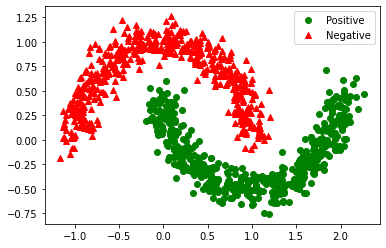

In [85]:
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="Positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="Negative")
plt.legend()
plt.show()

In [86]:
X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]

In [87]:
X_moons_with_bias[:5]

array([[ 1.        , -1.04041541,  0.2593172 ],
       [ 1.        , -0.87690781,  0.71716305],
       [ 1.        , -0.05176601,  0.17144429],
       [ 1.        ,  1.77017809, -0.11691548],
       [ 1.        ,  0.13624349,  1.03418265]])

In [88]:
y_moons_column_vector = y_moons.reshape(-1, 1)

In [89]:
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

In [90]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [91]:
X_batch, y_batch = random_batch(X_train, y_train, 5)
X_batch

array([[ 1.        ,  0.56662761,  0.61405463],
       [ 1.        , -0.88745633,  0.52356176],
       [ 1.        , -0.09593897,  0.98536308],
       [ 1.        , -0.54951966,  0.72140468],
       [ 1.        , -1.03773679,  0.02002096]])

In [92]:
y_batch

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [93]:
reset_graph()

In [94]:
n_inputs = 2

In [95]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed=55), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = 1 / (1 + tf.exp(-logits))

In [96]:
y_proba = tf.sigmoid(logits)

In [97]:
epsilon = 1e-7  # to avoid an overflow when computing the log
loss = -tf.reduce_mean(y * tf.log(y_proba + epsilon) + (1 - y) * tf.log(1 - y_proba + epsilon))

In [98]:
loss = tf.losses.log_loss(y, y_proba)  # uses epsilon = 1e-7 by default

In [99]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [100]:
init = tf.global_variables_initializer()

In [101]:
n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val = loss.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)

    y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})

Epoch: 0 	Loss: 0.7139546
Epoch: 100 	Loss: 0.35528415
Epoch: 200 	Loss: 0.3090748
Epoch: 300 	Loss: 0.28753236
Epoch: 400 	Loss: 0.27620205
Epoch: 500 	Loss: 0.26895764
Epoch: 600 	Loss: 0.26432994
Epoch: 700 	Loss: 0.26093873
Epoch: 800 	Loss: 0.25875986
Epoch: 900 	Loss: 0.2570105


In [102]:
y_proba_val[:5]

array([[0.6278026 ],
       [0.1208533 ],
       [0.8089659 ],
       [0.03510776],
       [0.98115313]], dtype=float32)

In [103]:
y_pred = (y_proba_val >= 0.5)
y_pred[:5]

array([[ True],
       [False],
       [ True],
       [False],
       [ True]])

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_test, y_pred)

0.8529411764705882

In [105]:
recall_score(y_test, y_pred)

0.8877551020408163

In [106]:
f1_score(y_test, y_pred)

0.87

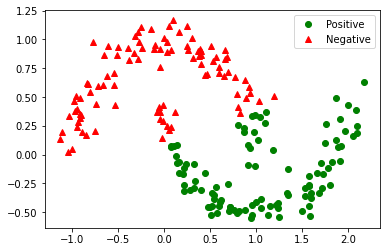

In [107]:
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

In [108]:
X_train_enhanced = np.c_[X_train,
                         np.square(X_train[:, 1]),
                         np.square(X_train[:, 2]),
                         X_train[:, 1] ** 3,
                         X_train[:, 2] ** 3]
X_test_enhanced = np.c_[X_test,
                        np.square(X_test[:, 1]),
                        np.square(X_test[:, 2]),
                        X_test[:, 1] ** 3,
                        X_test[:, 2] ** 3]

In [109]:
X_train_enhanced.shape

(800, 7)

In [110]:
reset_graph()

In [111]:
def logistic_regression(X, y, initializer=None, seed=55, learning_rate=0.01):
    n_inputs_including_bias = int(X.get_shape()[1])
    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            if initializer is None:
                initializer = tf.random_uniform([n_inputs_including_bias, 1], -1.0, 1.0, seed=seed)
            theta = tf.Variable(initializer, name="theta")
            logits = tf.matmul(X, theta, name="logits")
            y_proba = tf.sigmoid(logits)
        with tf.name_scope("train"):
            loss = tf.losses.log_loss(y, y_proba, scope="loss")
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss', loss)
        with tf.name_scope("init"):
            init = tf.global_variables_initializer()
        with tf.name_scope("save"):
            saver = tf.train.Saver()
    return y_proba, loss, training_op, loss_summary, init, saver

In [112]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [113]:
n_inputs = 2 + 4
logdir = log_dir("logreg")

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [114]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./models/my_logreg_model"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))

    saver.save(sess, final_model_path)
    y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
    os.remove(checkpoint_epoch_path)

Epoch: 0 	Loss: 1.0210636
Epoch: 500 	Loss: 0.16051973
Epoch: 1000 	Loss: 0.112247065
Epoch: 1500 	Loss: 0.0890018
Epoch: 2000 	Loss: 0.07484798
Epoch: 2500 	Loss: 0.06549355
Epoch: 3000 	Loss: 0.05846446
Epoch: 3500 	Loss: 0.053244147
Epoch: 4000 	Loss: 0.04919156
Epoch: 4500 	Loss: 0.045878693
Epoch: 5000 	Loss: 0.042978708
Epoch: 5500 	Loss: 0.04073383
Epoch: 6000 	Loss: 0.038682833
Epoch: 6500 	Loss: 0.036881603
Epoch: 7000 	Loss: 0.03536608
Epoch: 7500 	Loss: 0.03405993
Epoch: 8000 	Loss: 0.032896604
Epoch: 8500 	Loss: 0.031772044
Epoch: 9000 	Loss: 0.030746384
Epoch: 9500 	Loss: 0.029842796
Epoch: 10000 	Loss: 0.029036965


In [115]:
y_pred = (y_proba_val >= 0.5)

In [116]:
precision_score(y_test, y_pred)

0.98989898989899

In [117]:
recall_score(y_test, y_pred)

1.0

In [118]:
f1_score(y_test, y_pred)

0.9949238578680203

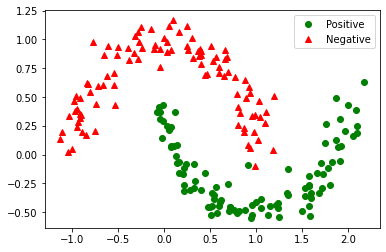

In [119]:
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

In [120]:
from scipy.stats import reciprocal

n_search_iterations = 10

for search_iteration in range(n_search_iterations):
    batch_size = np.random.randint(1, 100)
    learning_rate = reciprocal(0.0001, 0.1).rvs(random_state=search_iteration)

    n_inputs = 2 + 4
    logdir = log_dir("logreg")
    
    print("Iteration", search_iteration)
    print("  logdir:", logdir)
    print("  batch size:", batch_size)
    print("  learning_rate:", learning_rate)
    print("  training: ", end="")

    reset_graph()

    X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1), name="X")
    y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

    y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(
        X, y, learning_rate=learning_rate)

    file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

    n_epochs = 10001
    n_batches = int(np.ceil(m / batch_size))

    final_model_path = "./models/my_logreg_model_%d" % search_iteration

    with tf.Session() as sess:
        sess.run(init)

        for epoch in range(n_epochs):
            for batch_index in range(n_batches):
                X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
            file_writer.add_summary(summary_str, epoch)
            if epoch % 500 == 0:
                print(".", end="")

        saver.save(sess, final_model_path)

        print()
        y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
        y_pred = (y_proba_val >= 0.5)
        
        print("  precision:", precision_score(y_test, y_pred))
        print("  recall:", recall_score(y_test, y_pred))

Iteration 0
  logdir: tf_logs/logreg-run-20201224075228/
  batch size: 80
  learning_rate: 0.004430375245218265
  training: .....................
  precision: 0.98
  recall: 1.0
Iteration 1
  logdir: tf_logs/logreg-run-20201224075404/
  batch size: 67
  learning_rate: 0.0017826497151386947
  training: .....................
  precision: 0.9607843137254902
  recall: 1.0
Iteration 2
  logdir: tf_logs/logreg-run-20201224075552/
  batch size: 40
  learning_rate: 0.00203228544324115
  training: .....................
  precision: 0.98
  recall: 1.0
Iteration 3
  logdir: tf_logs/logreg-run-20201224075843/
  batch size: 80
  learning_rate: 0.004491523825137997
  training: .....................
  precision: 0.98
  recall: 1.0
Iteration 4
  logdir: tf_logs/logreg-run-20201224080018/
  batch size: 67
  learning_rate: 0.07963234721775589
  training: .....................
  precision: 1.0
  recall: 1.0
Iteration 5
  logdir: tf_logs/logreg-run-20201224080206/
  batch size: 40
  learning_rate: 0.00046